# **DataCamp Associate Data Analyst Case Study Project - Food Claims Process**

### **By Hemanth Reddy Mutra**

## Table of Contents
1. Introduction
2. Importing required files and libraries
3. Data Inspection
4. Data Cleaning
5. Sanity Check After Data Cleaning
6. Data Exploration
7. Further Data Exploration
8. Conclusions

## **Introduction**

The case study is about a fast food chain in Brazil named Vivendo with over 200 outlets where consumers file claims against such as food poisoning.


Customers often claim compensation from the company for food poisoning.
The legal team processes these claims. The legal team has offices in four locations.
The legal team wants to improve how long it takes to reply to customers and close claims.


The head of the legal department wants a report on how each location differs in the time it
takes to close claims.

### **Customer Question**

For every column in the data:
1. State whether the values match the description given in the table above.
2. State the number of missing values in the column.
3. Describe what you did to make values match the description if they did not match.

### Dataset: The dataset contains one row for each claim.

The following are the dataset descriptions:

1. **Claim ID             :** Character, the unique identifier of the claim.
2. **Time to Close        :** Numeric, number of days it took for the claim to be closed.
3. **Claim Amount         :** Numeric, initial claim value in the currency of Brazil.
4. **Amount Paid          :** Numeric, total amount paid after the claim closed in the currency of Brazil.
5. **Location             :** Character, location of the claim, one of “RECIFE”, “SAO LUIS”, “FORTALEZA”, or “NATAL”.
6. **Individuals on Claim :** Numeric, number of individuals on this claim.
7. **Linked Cases         :** Binary, whether this claim is believed to be linked with other cases, either TRUE or FALSE.
8. **Cause                :** Character, the cause of the food poisoning injuries, one of ‘vegetable’, ‘meat’, or ‘unknown’.

a. the values match the description given in the table above.

### **Importing required files and libraries**

In [5]:
#importing all the required packages and plots
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
for dirname, _, filenames in os.walk('/hemanthreddy/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

`/Users/hemanthreddy/Downloads/food_claims_2212.csv`

#Reading the csv files and saving it as dataframe with the name claims


In [7]:
import pandas as pd
food_claims_2212 = pd.read_csv('food_claims_2212.csv')
food_claims_2212

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable
...,...,...,...,...,...,...,...,...
1995,1996,176,R$ 28982.3,24265.02,RECIFE,10,False,meat
1996,1997,166,R$ 5188.44,4772.77,FORTALEZA,2,True,meat
1997,1998,179,R$ 11975.85,10087.81,RECIFE,4,True,meat
1998,1999,162,R$ 23516.28,23310.24,RECIFE,9,False,meat


In [8]:
food_claims_2212.head()

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable


**The preceding output shows that:**

- Some unwanted characters appear before the amount in the Claim Amount column.
- The amount_paid & linked_causes column have some empty values.

### b. 

## **Data** **Inspection**



In this section, The data will be checked for quality and tidiness issues.

In [9]:
#to get the information about food_claims_2212 file
food_claims_2212.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   object 
 3   amount_paid           1964 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          1974 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB


the data type for linked_causes & amount_paid are not accurate
most of the columns are non-null

**The above output shows that:**
- Approximately, there are 1.8% of empty values in amount_paid column
- There are 1.3% of empty values in linked_cases column


## **Deleting Duplicate files**

In [10]:
#checking_duplicates
food_claims_2212.duplicated().sum()

0

there are no missing values in the column

In [11]:
#summary of food_claims
food_claims_2212.describe()

,claim_id,time_to_close,amount_paid,individuals_on_claim
count,2000.000000,2000.00000,1964.000000,2000.000000
mean,1000.500000,185.56800,21541.975183,8.049500
std,577.494589,49.16339,12530.156509,4.087347
min,1.000000,76.00000,1516.720000,1.000000
25%,500.750000,158.00000,10995.950000,4.000000
50%,1000.500000,179.00000,20105.700000,8.000000
75%,1500.250000,204.00000,30709.350000,12.000000
max,2000.000000,518.00000,52498.750000,15.000000


### c. 



there are no negative values in the data, hence the values match the description from the above table

## **Data Cleaning**

#inorder to prepare for the analysis. The data will be cleaned here

**claim_id**  :  Nominal. The unique identifier of the claim.Missing values are not possible due to the database structure.

**time_to_close**: Discrete. The number of days to close the claim. Any positive value.Replace missing values with the overall median time to close.

**claim_amount**: Continuous. The initial claim requested in the currency of Brazil, rounded to 2 decimal places.Replace missing values with the overall median claim amount.

**amount_paid**: Continuous. Final amount paid. In the currency of Brazil. Rounded to 2 decimal places. Replace missing values with the overall median amount paid.

**location**:Nominal. Location of the claim, one of “RECIFE”, “SAO LUIS”,“FORTALEZA”, or “NATAL”.Remove missing values.

**individuals_on_claim**: Discrete. Number of individuals on this claim. Minimum 1 person.Replace missing value with 0.

**linked_cases**: Nominal. Whether this claim is linked to other cases. Either TRUE or FALSE.Replace missing values with FALSE.

**cause**:  Nominal. Cause of the food poisoning. One of “vegetable”, “meat” or “unknown”.Replace missing values with ‘unknown’

In [12]:
food_claims_2212.columns = food_claims_2212.columns.str.replace(' ','*')
#removing empty spaces and placing it with '*'


In [13]:
#replacing the missing values with the overall median time to close.
food_claims_2212['time_to_close'].fillna(food_claims_2212['time_to_close'].median())

0       317
1       195
2       183
3       186
4       138
       ... 
1995    176
1996    166
1997    179
1998    162
1999    150
Name: time_to_close, Length: 2000, dtype: int64

In [14]:
food_claims_2212 = pd.read_csv('food_claims_2212.csv')
#replacing the R,$ from the above column
food_claims_2212['claim_amount'] = food_claims_2212['claim_amount'].str.replace('R\$', '')
#convert the object into numeric
food_claims_2212['claim_amount'] = pd.to_numeric(food_claims_2212['claim_amount'],errors='coerce')
#rounding the decimal value to 2
food_claims_2212['claim_amount'] = food_claims_2212['claim_amount'].round(2)

# Fill empty values with the median of the column
median = food_claims_2212['claim_amount'].median()
food_claims_2212['claim_amount'] = food_claims_2212['claim_amount'].fillna(median)

In [15]:
#rounded to 2 decimal places and replacing missing values with the overall median amount_paid.
food_claims_2212['amount_paid'] = food_claims_2212['amount_paid'].round(2)
# Fill empty values with the median of the column
median = food_claims_2212['amount_paid'].median()
food_claims_2212['amount_paid'] = food_claims_2212['amount_paid'].fillna(median)

In [16]:

#to find empty spaces in the above column
food_claims_2212['location'].isnull().sum()


0

As there are no empty spaces left in the location. We don't need to remove the empty spaces

In [17]:
# using slicing to Create month of Claim column
# from the claim ID Column.
food_claims_2212['claim_id'] = food_claims_2212['claim_id'].astype(str) # convert claim_id column to string type
food_claims_2212['month_of_claim'] = food_claims_2212.claim_id.str[11:15] # extract month of claim using slicing

In [18]:
# Decoding the days in time_to_close column to months
# and then storing it in a list years

months = []

def append_value(days):
    months.append(days)

for day in food_claims_2212['time_to_close']:
    if day <= 120:
        append_value('Within 4 months')
    elif day <= 180:
        append_value('Within 6 months')
    elif day <= 240:
        append_value('Within 8 months')
    elif day <= 300:
        append_value('Within 10 months')
    else:
        append_value('10 months and above')

In [19]:
# Using the values in years list to create the years
# it takes to close a claim

food_claims_2212['months_to_close'] = months

In [20]:
# this is to remove unwanted characters from the column
food_claims_2212['location'].dropna(inplace= True)

In [21]:
food_claims_2212['individuals_on_claim'].describe()
# the minimum value is 1 and the 2000 fields are filled in 'individuals_on_claim'

count    2000.000000
mean        8.049500
std         4.087347
min         1.000000
25%         4.000000
50%         8.000000
75%        12.000000
max        15.000000
Name: individuals_on_claim, dtype: float64

In [22]:
#to replace the empty values with '0'
food_claims_2212['individuals_on_claim'].replace(to_replace = np.nan, value = 0) 

0       15
1       12
2       10
3       11
4       11
        ..
1995    10
1996     2
1997     4
1998     9
1999     4
Name: individuals_on_claim, Length: 2000, dtype: int64

In [23]:
#Replacing the empty values with FALSE
food_claims_2212['linked_cases'].fillna("False", inplace= True) 


In [24]:
#Replacing the missing values with 'unknown'
food_claims_2212['cause'].replace(to_replace = np.nan, value = 'unknown')

0         unknown
1         unknown
2            meat
3            meat
4       vegetable
          ...    
1995         meat
1996         meat
1997         meat
1998         meat
1999    vegetable
Name: cause, Length: 2000, dtype: object

## **Sanity check after Data Cleaning**

In this section, I'll double-check the structure before moving on to analysis. To determine whether or not the necessary adjustment has been made.

In [25]:
#displaying the top rows of the data
food_claims_2212.head()

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause,month_of_claim,months_to_close
0,1,317,74474.55,51231.37,RECIFE,15,False,unknown,,10 months and above
1,2,195,52137.83,42111.30,FORTALEZA,12,True,unknown,,Within 8 months
2,3,183,24447.20,23986.30,SAO LUIS,10,True,meat,,Within 8 months
3,4,186,29006.28,27942.72,FORTALEZA,11,False,meat,,Within 8 months
4,5,138,19520.60,16251.06,RECIFE,11,False,vegetable,,Within 6 months


In [26]:
food_claims_2212.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   object 
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   float64
 3   amount_paid           2000 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          2000 non-null   object 
 7   cause                 2000 non-null   object 
 8   month_of_claim        2000 non-null   object 
 9   months_to_close       2000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 156.4+ KB


In [27]:
#summary of the cleaned data
food_claims_2212.describe()

,time_to_close,claim_amount,amount_paid,individuals_on_claim
count,2000.00000,2000.000000,2000.000000,2000.000000
mean,185.56800,27156.965235,21516.122230,8.049500
std,49.16339,16195.783099,12418.285043,4.087347
min,76.00000,1637.940000,1516.720000,1.000000
25%,158.00000,13758.952500,11106.652500,4.000000
50%,179.00000,24821.085000,20105.700000,8.000000
75%,204.00000,38581.350000,30472.895000,12.000000
max,518.00000,76106.800000,52498.750000,15.000000


 **The dataframe appears to be clean enough, and the structure appears to be adequate and ready for analysis.**

## **Data Exploration**

Create a visualization that shows the number of claims in each location. Use the
visualization to:


a. State which category of the variable location has the most observations

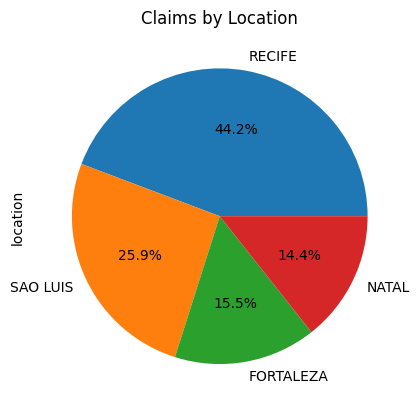

In [42]:

# Choosing a single color for the chart
color = sns.color_palette()[0]

# Count the number of claims in each location
location_counts = food_claims_2212['location'].value_counts()

# Create a pie chart of the location counts
location_counts.plot(kind='pie', autopct='%1.1f%%', colors=[color, sns.color_palette()[1], sns.color_palette()[2], sns.color_palette()[3]])

# Add a title to the chart
plt.title('Claims by Location')

# Show the chart
plt.show()


### Insights:

- The Visualization above shows how the number of claims differ across locations.
- A column chart was used to answer the customers question because we are comparing values across few categories and the other of the categories is not important.
- From the chart, we can see that the city **RECIFE** has the most number of observations , while the city **Natal** register the lowest number of observations to make claim blaming Vivendo for suspected food poisoning

**b. Explain whether the observations are balanced across categories of the
variable location**

In [48]:
# Count the number of claims in each location
location_counts = food_claims_2212['location'].value_counts()

# Calculate the percentage of claims in each location
location_percentages = location_counts / len(food_claims_2212) * 100

# Print the percentage of claims in each location
print(location_percentages)


RECIFE       44.25
SAO LUIS     25.85
FORTALEZA    15.55
NATAL        14.35
Name: location, dtype: float64


**Insights:**

- To determine whether the observations are balanced across categories of the variable location, you can compare the number of observations or claims in each category. 
- In this case, the values provided suggest that **RECIFE** has the most claims at **44.25%**, followed by **SAO LUIS** with **25.85%**, **FORTALEZA** with **15.55%**, and **NATAL** with **14.35%**.
- If the observations were balanced across categories, you would expect to see a similar number of claims in each location, or a similar percentage of claims in each location. However, based on the values provided, the claims are **not balanced** across locations, with **RECIFE** having the highest percentage of claims and **NATAL** having the lowest.
- **FORTALEZA** and **NATAL** having similar percentages of observations are relatively balanced across categories of the variable location
- Therefore, it is important to keep in mind the different number of claims in each location when analyzing the data, as this may impact the results and conclusions of the study.

**3. Describe the distribution of time to close for all claims. Your answer must include a
visualization that shows the distribution.**

## **Distribution of time to close for all claims**

#Method1

In [39]:
import plotly.express as px

In [40]:
fig = px.histogram(food_claims_2212, x="time_to_close", nbins=20, marginal="box", title='Distribution of time to close all claims', width=600, labels={'time_to_close': 'Time to close'})
fig.show()

#Method2

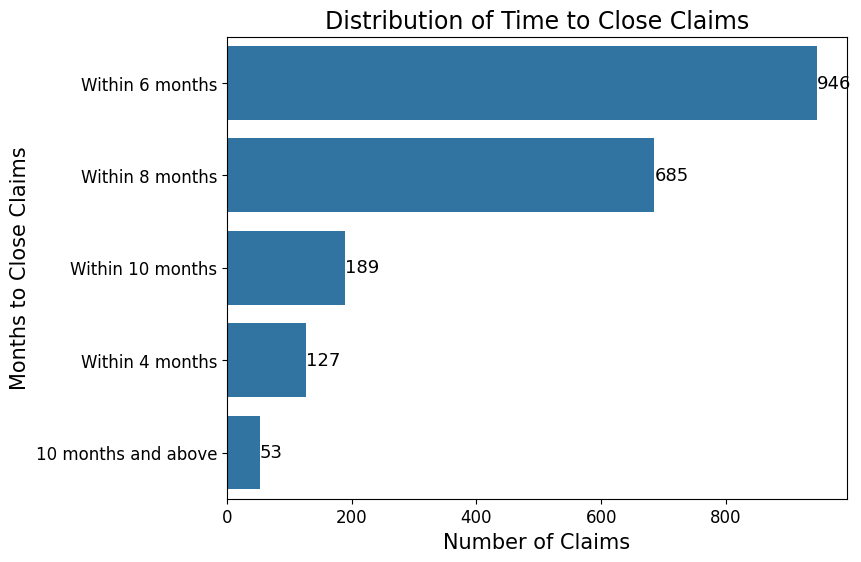

In [43]:
# Organizing the chart's order from highest to lowest.
order = food_claims_2212['months_to_close'].value_counts().index

# Plotting the chart to answer the above Question
plt.figure(figsize = [8, 6])
ax = sns.countplot(data = food_claims_2212, y ='months_to_close', color = color, order = order)

# Format the plot's visual
plt.xticks(fontsize = 12)
plt.xlabel('Number of Claims', size = 15)
plt.yticks(fontsize = 12)
plt.ylabel('Months to Close Claims', size = 15)
plt.title('Distribution of Time to Close Claims', size = 17);

# displaying the bar labels using bar_label() function. 
for container in ax.containers:
    ax.bar_label(container, size = 13)


**Insights**

- The Visualization shows the distribution of time to close claims i.e. in this case, years it takes to close a claim because of the investigations that needs to be done after filing the claim.
- A Bar chart is used here because the values we are dealing with here has to do with duration, and also because the category text is long.
- From the chart we can see that majority of the claims (946) where closed within six months followed by 685 claims closed within 8 months.
- This translates that it takes less than or exactly eight months to close the claim about the company (about 81.55% percent of the claims).
- This may imply that majority of the claims were false and that is why majority of the claims were closed early.

**Describe the relationship between time to close and location. Your answer must
include a visualization to demonstrate the relationship**

<AxesSubplot: xlabel='location', ylabel='time_to_close'>

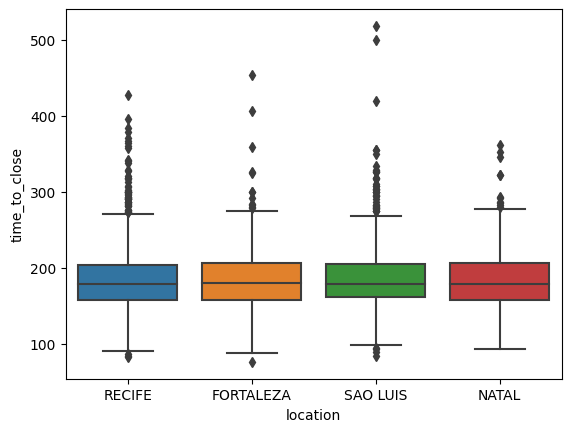

In [47]:
sns.boxplot(x="location", y="time_to_close", data=food_claims_2212)

The above box plot shows the distribution of time to close for each category of location, with the median value (line inside the box), the interquartile range (the box), and any outliers (the dots outside the box).

**Insights**

Based on the box plot, we can make observations about the relationship between time to close and location
- There is a large significance difference in SAO LUIS location as the outliers from the median is too far and significantlly it have more complex or difficult claims that take longer to close.
- There are many outliers in RECIFE location and time_to_close takes longer.
- The outliers are very near to the median line in NATAL location and time_to_close is very fast when compared to other locations
- There are less outliers in FORTALEZA location when compared to RECIFE and SAO LOUIS and the time_to_close is much faster after NATAL.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam